In [43]:
import pandas as pd

# load train data
df = pd.read_csv('train.csv')

In [44]:
# split the data as the train set so large
from sklearn.cross_validation import train_test_split

train, test = train_test_split(df, train_size=10000, test_size=66020)

In [45]:
# using PCA to reduce dimensionality of the data set
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
new_features_for_train_set = pca.fit_transform(train.values)

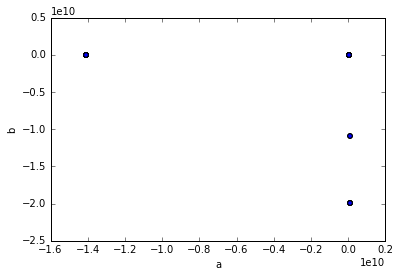

In [46]:
# matplotlib magic
%matplotlib inline

# some basic visualizations
visual_df = pd.DataFrame(new_features_for_train_set, columns=['a', 'b'])
visual_df.plot(kind='scatter', x='a', y='b')

In [47]:
# remove the Y_values
Y_values = train.TARGET
train.drop('TARGET', axis=1, inplace=True)

# because we split test from the train
Original_Y_for_test = test.TARGET
test.drop('TARGET', axis=1, inplace=True)

# basic logistic reqression
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(train, Y_values)

predictions = logistic_regression.predict(test)
print(predictions)

/opt/ds/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/ds/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[0 0 0 ..., 0 0 0]


In [48]:
# confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(Original_Y_for_test, predictions))

[[63405     0]
 [ 2615     0]]
